In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
import os
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import feature_selection
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn import naive_bayes
import seaborn as sns

In [55]:
os.chdir("C:")

In [56]:
vote=pd.read_csv("Book1.csv")

In [57]:
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
State    434 non-null object
Name     434 non-null object
Party    434 non-null object
Vote1    434 non-null object
Vote2    434 non-null object
Vote3    434 non-null object
Vote4    434 non-null object
dtypes: object(7)
memory usage: 23.8+ KB


In [59]:
vote.isna().sum()

State    0
Name     0
Party    0
Vote1    0
Vote2    0
Vote3    0
Vote4    0
dtype: int64

In [60]:
vote.Vote1.value_counts()

Y    300
N    124
-     10
Name: Vote1, dtype: int64

In [61]:
vote.Vote2.value_counts()

Y    283
N    138
-     13
Name: Vote2, dtype: int64

In [62]:
vote.Vote3.value_counts()

Y    247
N    175
-     12
Name: Vote3, dtype: int64

In [63]:
vote.isna().sum()

State    0
Name     0
Party    0
Vote1    0
Vote2    0
Vote3    0
Vote4    0
dtype: int64

In [64]:
vote.columns.values

array(['State', 'Name', 'Party', 'Vote1', 'Vote2', 'Vote3', 'Vote4'],
      dtype=object)

In [65]:
vote.head(5)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,R,Y,Y,Y,N
1,CT,Nancy Johnson,R,Y,N,N,Y
2,AL,Robert Cramer,D,Y,Y,Y,Y
3,FL,Kendrick Meek,D,Y,N,N,N
4,MI,Peter Hoekstra,R,N,Y,Y,Y


In [66]:
vote[(vote.Vote1=="-")|(vote.Vote2=="-")|(vote.Vote3=="-")|(vote.Vote4=="-")].shape

(34, 7)

In [70]:
vote.head(5)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,R,Y,Y,Y,N
1,CT,Nancy Johnson,R,Y,N,N,Y
2,AL,Robert Cramer,D,Y,Y,Y,Y
3,FL,Kendrick Meek,D,Y,N,N,N
4,MI,Peter Hoekstra,R,N,Y,Y,Y


In [67]:
vote.Vote1.replace(('Y','N','-'),(1,0,0),inplace=True)

In [68]:
vote.Vote1.value_counts()

1    300
0    134
Name: Vote1, dtype: int64

In [69]:
vote.Vote2.replace(('Y','N','-'),(1,0,0),inplace=True)

In [70]:
vote.Vote3.replace(('Y','N','-'),(1,0,0),inplace=True)

In [71]:
vote.Vote4.replace(('Y','N','-'),(1,0,0),inplace=True)

In [72]:
vote.corr()

,Vote1,Vote2,Vote3,Vote4
Vote1,1.000000,0.653169,0.576739,-0.271004
Vote2,0.653169,1.000000,0.644129,-0.267542
Vote3,0.576739,0.644129,1.000000,-0.312111
Vote4,-0.271004,-0.267542,-0.312111,1.000000


In [73]:
vote.Party.value_counts()

R    227
D    207
Name: Party, dtype: int64

In [74]:
vote.Party.replace(('R','D'),(1,0),inplace=True)

In [75]:
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
State    434 non-null object
Name     434 non-null object
Party    434 non-null int64
Vote1    434 non-null int64
Vote2    434 non-null int64
Vote3    434 non-null int64
Vote4    434 non-null int64
dtypes: int64(5), object(2)
memory usage: 23.8+ KB


In [76]:
vote.head(5)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,1,1,1,1,0
1,CT,Nancy Johnson,1,1,0,0,1
2,AL,Robert Cramer,0,1,1,1,1
3,FL,Kendrick Meek,0,1,0,0,0
4,MI,Peter Hoekstra,1,0,1,1,1


In [77]:
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
State    434 non-null object
Name     434 non-null object
Party    434 non-null int64
Vote1    434 non-null int64
Vote2    434 non-null int64
Vote3    434 non-null int64
Vote4    434 non-null int64
dtypes: int64(5), object(2)
memory usage: 23.8+ KB


In [78]:
X=vote.drop(["Party","Name","State"],axis=1)

In [79]:
y=vote["Party"]

In [80]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X,y,test_size=.2,random_state=42)

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 4 columns):
Vote1    434 non-null int64
Vote2    434 non-null int64
Vote3    434 non-null int64
Vote4    434 non-null int64
dtypes: int64(4)
memory usage: 13.6 KB


In [82]:
kbest= feature_selection.SelectKBest(feature_selection.f_classif,k=4)

In [83]:
type(kbest)

sklearn.feature_selection.univariate_selection.SelectKBest

In [84]:
kbest.fit(X,y)

SelectKBest(k=4, score_func=<function f_classif at 0x000001AA95AC8840>)

In [85]:
kbest.get_support()

array([ True,  True,  True,  True])

In [86]:
X.columns[kbest.get_support()]

Index(['Vote1', 'Vote2', 'Vote3', 'Vote4'], dtype='object')

In [87]:
X1=X[X.columns[kbest.get_support()]]

In [88]:
X1.head()

,Vote1,Vote2,Vote3,Vote4
0,1,1,1,0
1,1,0,0,1
2,1,1,1,1
3,1,0,0,0
4,0,1,1,1


In [89]:
model=neighbors.KNeighborsClassifier(n_neighbors=9)

In [90]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [91]:
predicted=model.predict(Xtest)

In [92]:
predicted

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [93]:
metrics.accuracy_score(ytest,predicted)

0.8620689655172413

In [94]:
metrics.recall_score(ytest,predicted)

0.9

In [95]:
metrics.precision_score(ytest,predicted)

0.8653846153846154

In [96]:
metrics.confusion_matrix(ytest,predicted)

array([[30,  7],
       [ 5, 45]], dtype=int64)

In [97]:
metrics.roc_auc_score(ytest,predicted)

0.8554054054054053

In [98]:
m=X.tail(4)

In [99]:
m

,Vote1,Vote2,Vote3,Vote4
430,1,0,1,1
431,0,0,0,1
432,1,1,1,0
433,1,1,0,1


In [100]:
prolist=model.predict_proba(m)

In [101]:
prolist

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.88888889, 0.11111111]])

In [102]:
train_predicted=model.predict(Xtrain)

In [103]:
train_predicted

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [104]:
metrics.accuracy_score(ytrain,train_predicted)

0.8789625360230547

In [105]:
metrics.recall_score(ytrain,train_predicted)

0.9096045197740112

In [106]:
metrics.precision_score(ytrain,train_predicted)

0.8609625668449198

In [107]:
metrics.confusion_matrix(ytrain,train_predicted)

array([[144,  26],
       [ 16, 161]], dtype=int64)

In [108]:
metrics.roc_auc_score(ytrain,train_predicted)

0.8783316716517114

# Naive Bayes

In [109]:
naive_model=naive_bayes.BernoulliNB()

In [110]:
naive_model.fit(Xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [111]:
naive_predicted=naive_model.predict(Xtest)

In [112]:
naive_predicted

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [113]:
metrics.accuracy_score(ytest,naive_predicted)

0.8620689655172413

In [114]:
metrics.recall_score(ytest,naive_predicted)

0.9

In [115]:
metrics.precision_score(ytest,naive_predicted)

0.8653846153846154

In [116]:
metrics.roc_auc_score(ytest,naive_predicted)

0.8554054054054053

In [117]:
naive_train_predicted=naive_model.predict(Xtrain)

In [118]:
metrics.accuracy_score(ytrain,naive_train_predicted)

0.8789625360230547

In [119]:
metrics.recall_score(ytrain,naive_train_predicted)

0.9096045197740112

In [120]:
metrics.precision_score(ytrain,naive_train_predicted)

0.8609625668449198

In [121]:
metrics.roc_auc_score(ytrain,naive_train_predicted)

0.8783316716517114

In [142]:
vote.head()

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,1,1,1,1,0
1,CT,Nancy Johnson,1,1,0,0,1
2,AL,Robert Cramer,0,1,1,1,1
3,FL,Kendrick Meek,0,1,0,0,0
4,MI,Peter Hoekstra,1,0,1,1,1


In [148]:
vote_new = vote_new.drop(['-','N','Y'],axis=1)

In [149]:
vote_new.shape

(400, 7)

In [150]:
vote_new.head()

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,1,Y,1,1,0
1,CT,Nancy Johnson,1,Y,0,0,1
2,AL,Robert Cramer,0,Y,1,1,1
3,FL,Kendrick Meek,0,Y,0,0,0
4,MI,Peter Hoekstra,1,N,1,1,1


In [151]:
vote_new.tail(10)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
423,NY,Thomas Reynolds,1,Y,1,1,0
424,PA,Tim Murphy,1,Y,1,1,0
425,FL,Michael Bilirakis,1,Y,1,1,0
426,AZ,Raul Grijalva,0,N,0,0,1
428,CO,Scott McInnis,1,Y,1,1,1
429,WA,Jennifer Dunn,1,Y,1,1,0
430,TX,Raymond Green,0,Y,0,1,1
431,GA,Denis Majette,0,N,0,0,1
432,FL,Clifford Stearns,1,Y,1,1,0
433,DE,Michael Castle,1,Y,1,0,1


In [152]:
vote_new.head()

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,1,Y,1,1,0
1,CT,Nancy Johnson,1,Y,0,0,1
2,AL,Robert Cramer,0,Y,1,1,1
3,FL,Kendrick Meek,0,Y,0,0,0
4,MI,Peter Hoekstra,1,N,1,1,1


In [154]:
vote_new.Vote1.replace(('Y','N'),(1,0),inplace=True)

In [155]:
vote_new.head(1)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4
0,AK,Donald Young,1,1,1,1,0


In [132]:
vote_new.Vote3.replace(('Y','N'),(1,0),inplace=True)

C:\Users\Arvind\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [133]:
vote_new.head(1)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4,-,N,Y
0,AK,Donald Young,R,Y,1,1,N,0,0,1


In [134]:
vote_new.Vote4.replace(('Y','N'),(1,0),inplace=True)

C:\Users\Arvind\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [135]:
vote_new.head(1)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4,-,N,Y
0,AK,Donald Young,R,Y,1,1,0,0,0,1


In [136]:
vote_new.Party.replace(('R','D'),(1,0),inplace=True)

C:\Users\Arvind\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [137]:
vote_new.head(1)

,State,Name,Party,Vote1,Vote2,Vote3,Vote4,-,N,Y
0,AK,Donald Young,1,Y,1,1,0,0,0,1


In [138]:
X_new=vote_new.drop(["Party","Name","State"],axis=1)

In [139]:
y_new=vote_new["Party"]

In [140]:
X_newtrain, X_newtest, y_newtrain, y_newtest=model_selection.train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [141]:
vote_new.corr()

,Party,Vote2,Vote3,Vote4,-,N,Y
Party,1.000000,0.688819,0.719798,-0.412440,NaN,-0.571825,0.571825
Vote2,0.688819,1.000000,0.655790,-0.299510,NaN,-0.657545,0.657545
Vote3,0.719798,0.655790,1.000000,-0.342174,NaN,-0.594664,0.594664
Vote4,-0.412440,-0.299510,-0.342174,1.000000,NaN,0.298240,-0.298240
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N,-0.571825,-0.657545,-0.594664,0.298240,NaN,1.000000,-1.000000
Y,0.571825,0.657545,0.594664,-0.298240,NaN,-1.000000,1.000000


In [159]:
model_new= neighbors.KNeighborsClassifier(n_neighbors = 9)

In [160]:
model_new.fit(X_newtrain,y_newtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [161]:
predicted_new = model_new.predict(X_newtest)

In [162]:
predicted

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [163]:
metrics.accuracy_score(y_newtest,predicted_new)

0.85

In [164]:
metrics.recall_score(y_newtest,predicted_new)

0.975

In [165]:
metrics.precision_score(y_newtest,predicted_new)

0.78

In [166]:
metrics.roc_auc_score(y_newtest,predicted_new)

0.85

In [167]:
train_predicted_new = model_new.predict(X_newtrain)

In [168]:
train_predicted_new

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [169]:
metrics.accuracy_score(y_newtrain,train_predicted_new)

0.884375

In [171]:
metrics.recall_score(y_newtrain,train_predicted_new)

0.943502824858757

In [172]:
metrics.precision_score(y_newtrain,train_predicted_new)

0.8608247422680413

In [173]:
metrics.roc_auc_score(y_newtrain,train_predicted_new)

0.8773458180237841

# Naive Bayes

In [174]:
naive_model_new=naive_bayes.BernoulliNB()

In [175]:
naive_model_new.fit(X_newtrain,y_newtrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [176]:
naive_predicted_new=naive_model_new.predict(X_newtest)

In [178]:
metrics.accuracy_score(y_newtest,naive_predicted_new)

0.9

In [179]:
metrics.recall_score(y_newtest,naive_predicted_new)

0.975

In [180]:
metrics.precision_score(y_newtest,naive_predicted_new)

0.8478260869565217

In [181]:
metrics.roc_auc_score(y_newtest,naive_predicted_new)

0.9

In [184]:
naive_train_predicted_new=naive_model_new.predict(X_newtrain)

In [185]:
metrics.accuracy_score(y_newtrain,naive_train_predicted_new)

0.875

In [186]:
metrics.recall_score(y_newtrain,naive_train_predicted_new)

0.9096045197740112

In [187]:
metrics.precision_score(y_newtrain,naive_train_predicted_new)

0.8702702702702703

In [188]:
metrics.roc_auc_score(y_newtrain,naive_train_predicted_new)

0.8708861759709217

# Probability of Republican and Democrats

In [189]:
probability_republican = vote.Party.value_counts()[1]/vote.shape[0]

In [190]:
probability_republican

0.4769585253456221

In [191]:
probability_democrats = vote.Party.value_counts()[0]/vote.shape[0]

In [192]:
probability_democrats

0.5230414746543779

In [208]:
ekdo = vote[(vote.Vote4=='Y')&(vote.Party=='R')]

In [209]:
ekdo.shape

(87, 7)

([<matplotlib.axis.XTick at 0x24f83f49e80>,
 <a list of 2 Text xticklabel objects>)

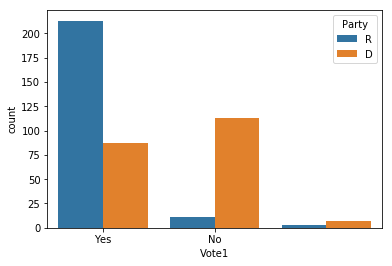

In [215]:
plt.figure
sns.countplot(x='Vote1',hue='Party',data=vote)
plt.xticks([1,0],['No','Yes'])

([<matplotlib.axis.XTick at 0x24f83fa95f8>,
 <a list of 2 Text xticklabel objects>)

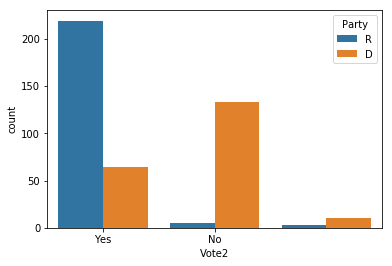

In [217]:
plt.figure
sns.countplot(x='Vote2',hue='Party',data=vote)
plt.xticks([1,0],['No','Yes'])

([<matplotlib.axis.XTick at 0x24f84079a90>,
 <a list of 2 Text xticklabel objects>)

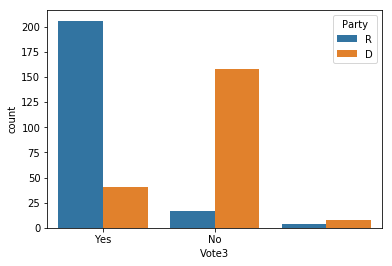

In [218]:
plt.figure()
sns.countplot(x='Vote3', hue='Party', data=vote)
plt.xticks([1,0], ['No','Yes'])

([<matplotlib.axis.XTick at 0x24f8414c828>,
 <a list of 2 Text xticklabel objects>)

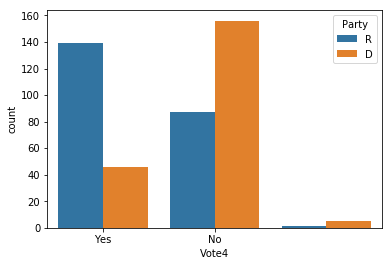

In [220]:
plt.figure()
sns.countplot(x='Vote4', hue='Party', data=vote)
plt.xticks([1,0], ['No','Yes'])